In [39]:
from astropy.table import Table, Column
from astLib import astCoords
import numpy as np
import matplotlib.pyplot as plt

In [40]:
pm = Table.read('snc3.pm.fits')
mag = Table.read('snc3.mags.fits')
racen = astCoords.hms2decimal('03:30:35',':')
deccen = astCoords.dms2decimal('-28:06:00',':')
racen = np.deg2rad(racen)
deccen = np.deg2rad(deccen)
x0 = np.deg2rad(pm['X0'])
y0 = np.deg2rad(pm['Y0'])

In [41]:
# do gnomonic transformation
# used equation from http://mathworld.wolfram.com/GnomonicProjection.html
pho = np.sqrt(x0**2+y0**2)
c = np.arctan(pho)
dec = np.arcsin(np.cos(c) * np.sin(deccen) + y0 * np.sin(c) * np.cos(deccen) / pho)
ra = racen + np.arctan(x0 * np.sin(c) / (pho * np.cos(deccen) * np.cos(c) - y0 * np.sin(deccen) * np.sin(c)))
ra = np.rad2deg(ra)
dec = np.rad2deg(dec)

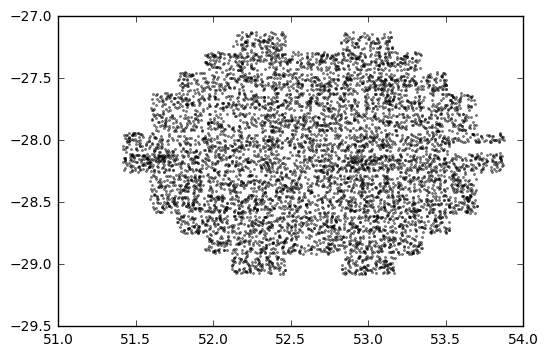

In [62]:
# check if the transformation make sense
plt.plot(ra,dec,'k.', ms=3,alpha=0.5)
plt.show()

In [43]:
addra  = Column(ra, name='ra')
adddec = Column(dec, name='dec')
pm.add_column(adddec, index=0)
pm.add_column(addra, index=0)

pm.write('snc3.pm_wRADec.fits', format='fits')

In [44]:
# Matched RA/Dec in TOPCAT and get a new fits file magXpm

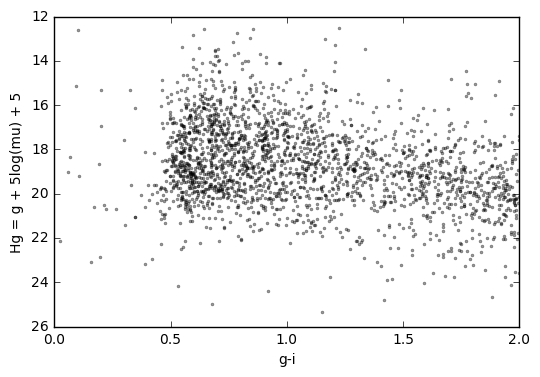

In [60]:
# plot RPM diagram
data = Table.read('snc3.magXpm.fits')
plt.plot(data['g']-data['i'], data['g']+5+5*np.log10(np.sqrt(data['PMX']**2+data['PMY']**2)/1000), 'k.', ms=4, alpha=0.4)
plt.ylim(26,12)
plt.xlabel('g-i')
plt.ylabel('Hg = g + 5log(mu) + 5')
plt.show()